In [1]:
import numpy as np
import pandas as pd

### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### EDA

In [3]:
df=pd.read_csv('BankChurners.csv',skipinitialspace=True)
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [4]:
df.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [61]:
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count  Education_Level  \
0  Existing Customer            45      M                3                2   
1  Existing Customer            49      F                5                4   
2  Existing Customer            51      M                3                4   
3  Existing Customer            40      F                4                2   
4  Existing Customer            40      M                3                1   

  Marital_Status  Income_Category  Card_Category  Months_on_book  \
0        Married                3              0              39   
1         Single                1              0              44   
2        Married                4              0              36   
3        Unknown                1              0              34   
4        Married                3              0              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [6]:
df.shape

(10127, 20)

In [7]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [8]:
numericCols=df._get_numeric_data().columns
numericDiscrete=[x for x in numericCols if len(df[x].unique())<=10]
numericDiscrete
numericContinuous=[x for x in numericCols if x not in numericDiscrete]
numericContinuous

['Customer_Age',
 'Months_on_book',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

### Data Cleaning

In [9]:
df.isnull().sum().sum()

0

### Data Visualization

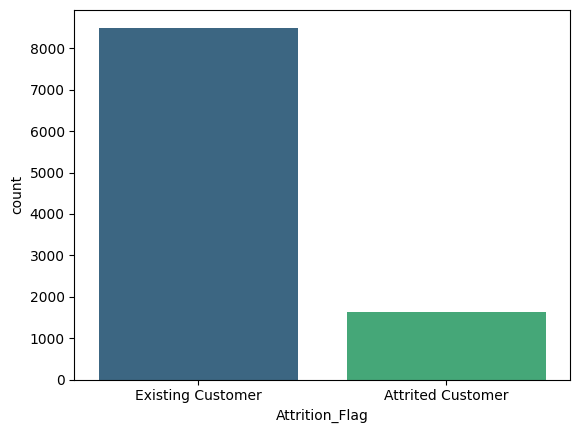

In [10]:
sns.countplot(data=df,x='Attrition_Flag',palette='viridis');

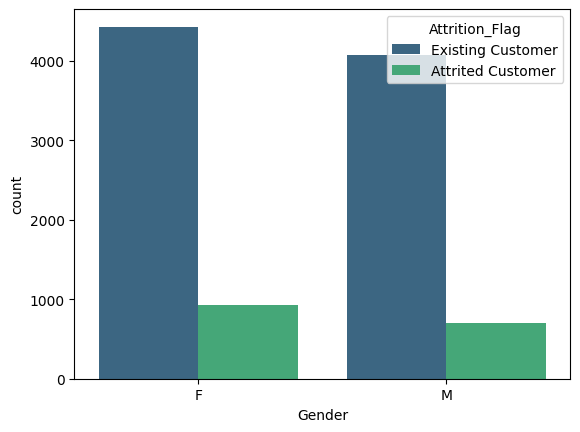

In [11]:
sns.countplot(data=df,x='Gender',hue='Attrition_Flag',order=df['Gender'].value_counts().index,palette='viridis');

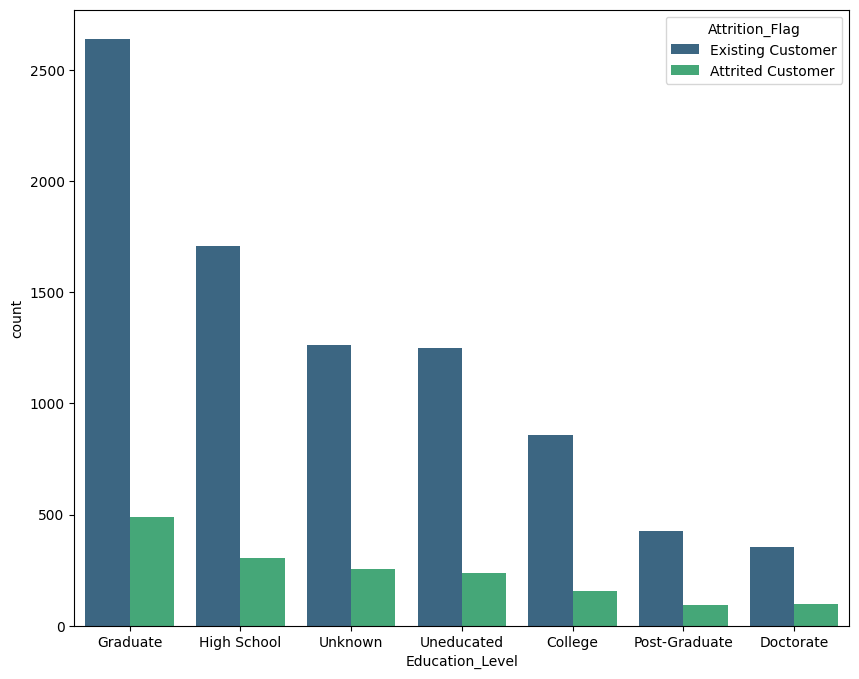

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Education_Level',hue='Attrition_Flag',order=df['Education_Level'].value_counts().index,palette='viridis');

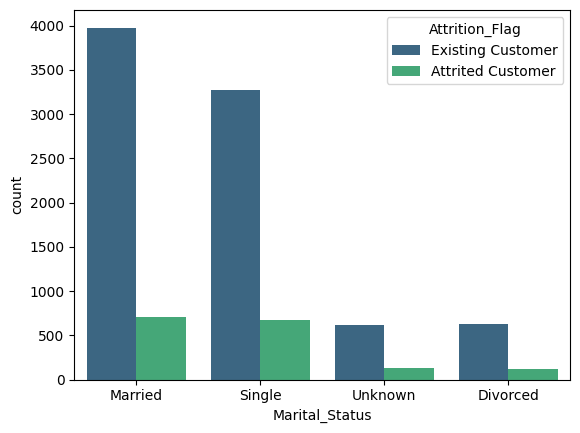

In [13]:
sns.countplot(data=df,x='Marital_Status',hue='Attrition_Flag',order=df['Marital_Status'].value_counts().index,palette='viridis');

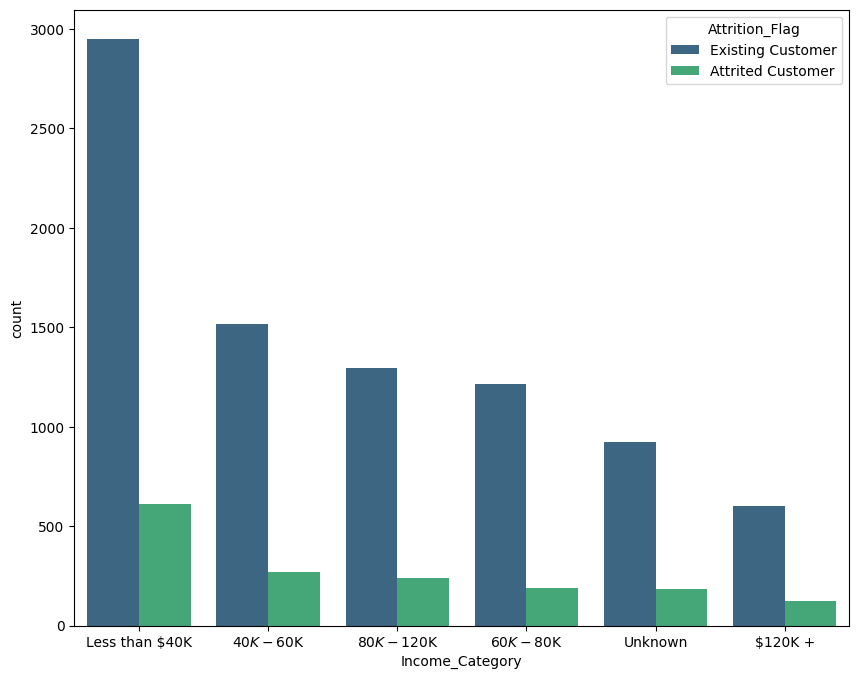

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Income_Category',hue='Attrition_Flag',order=df['Income_Category'].value_counts().index,palette='viridis');

Blue        0.931767
Silver      0.054804
Gold        0.011455
Platinum    0.001975
Name: Card_Category, dtype: float64


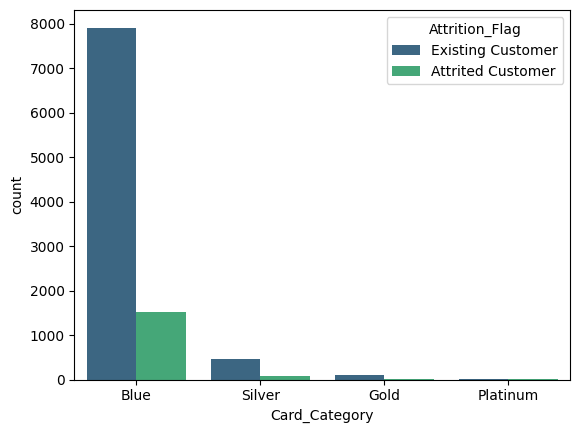

In [15]:
sns.countplot(data=df,x='Card_Category',hue='Attrition_Flag',order=df['Card_Category'].value_counts().index,palette='viridis');
print(df['Card_Category'].value_counts(normalize=True))

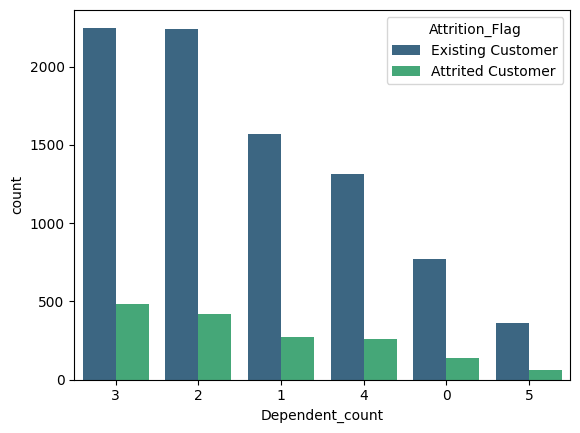

In [16]:
sns.countplot(data=df,x='Dependent_count',hue='Attrition_Flag',order=df['Dependent_count'].value_counts().index,palette='viridis');

In [17]:
add_data=numericContinuous.copy()
add_data.append('Attrition_Flag')

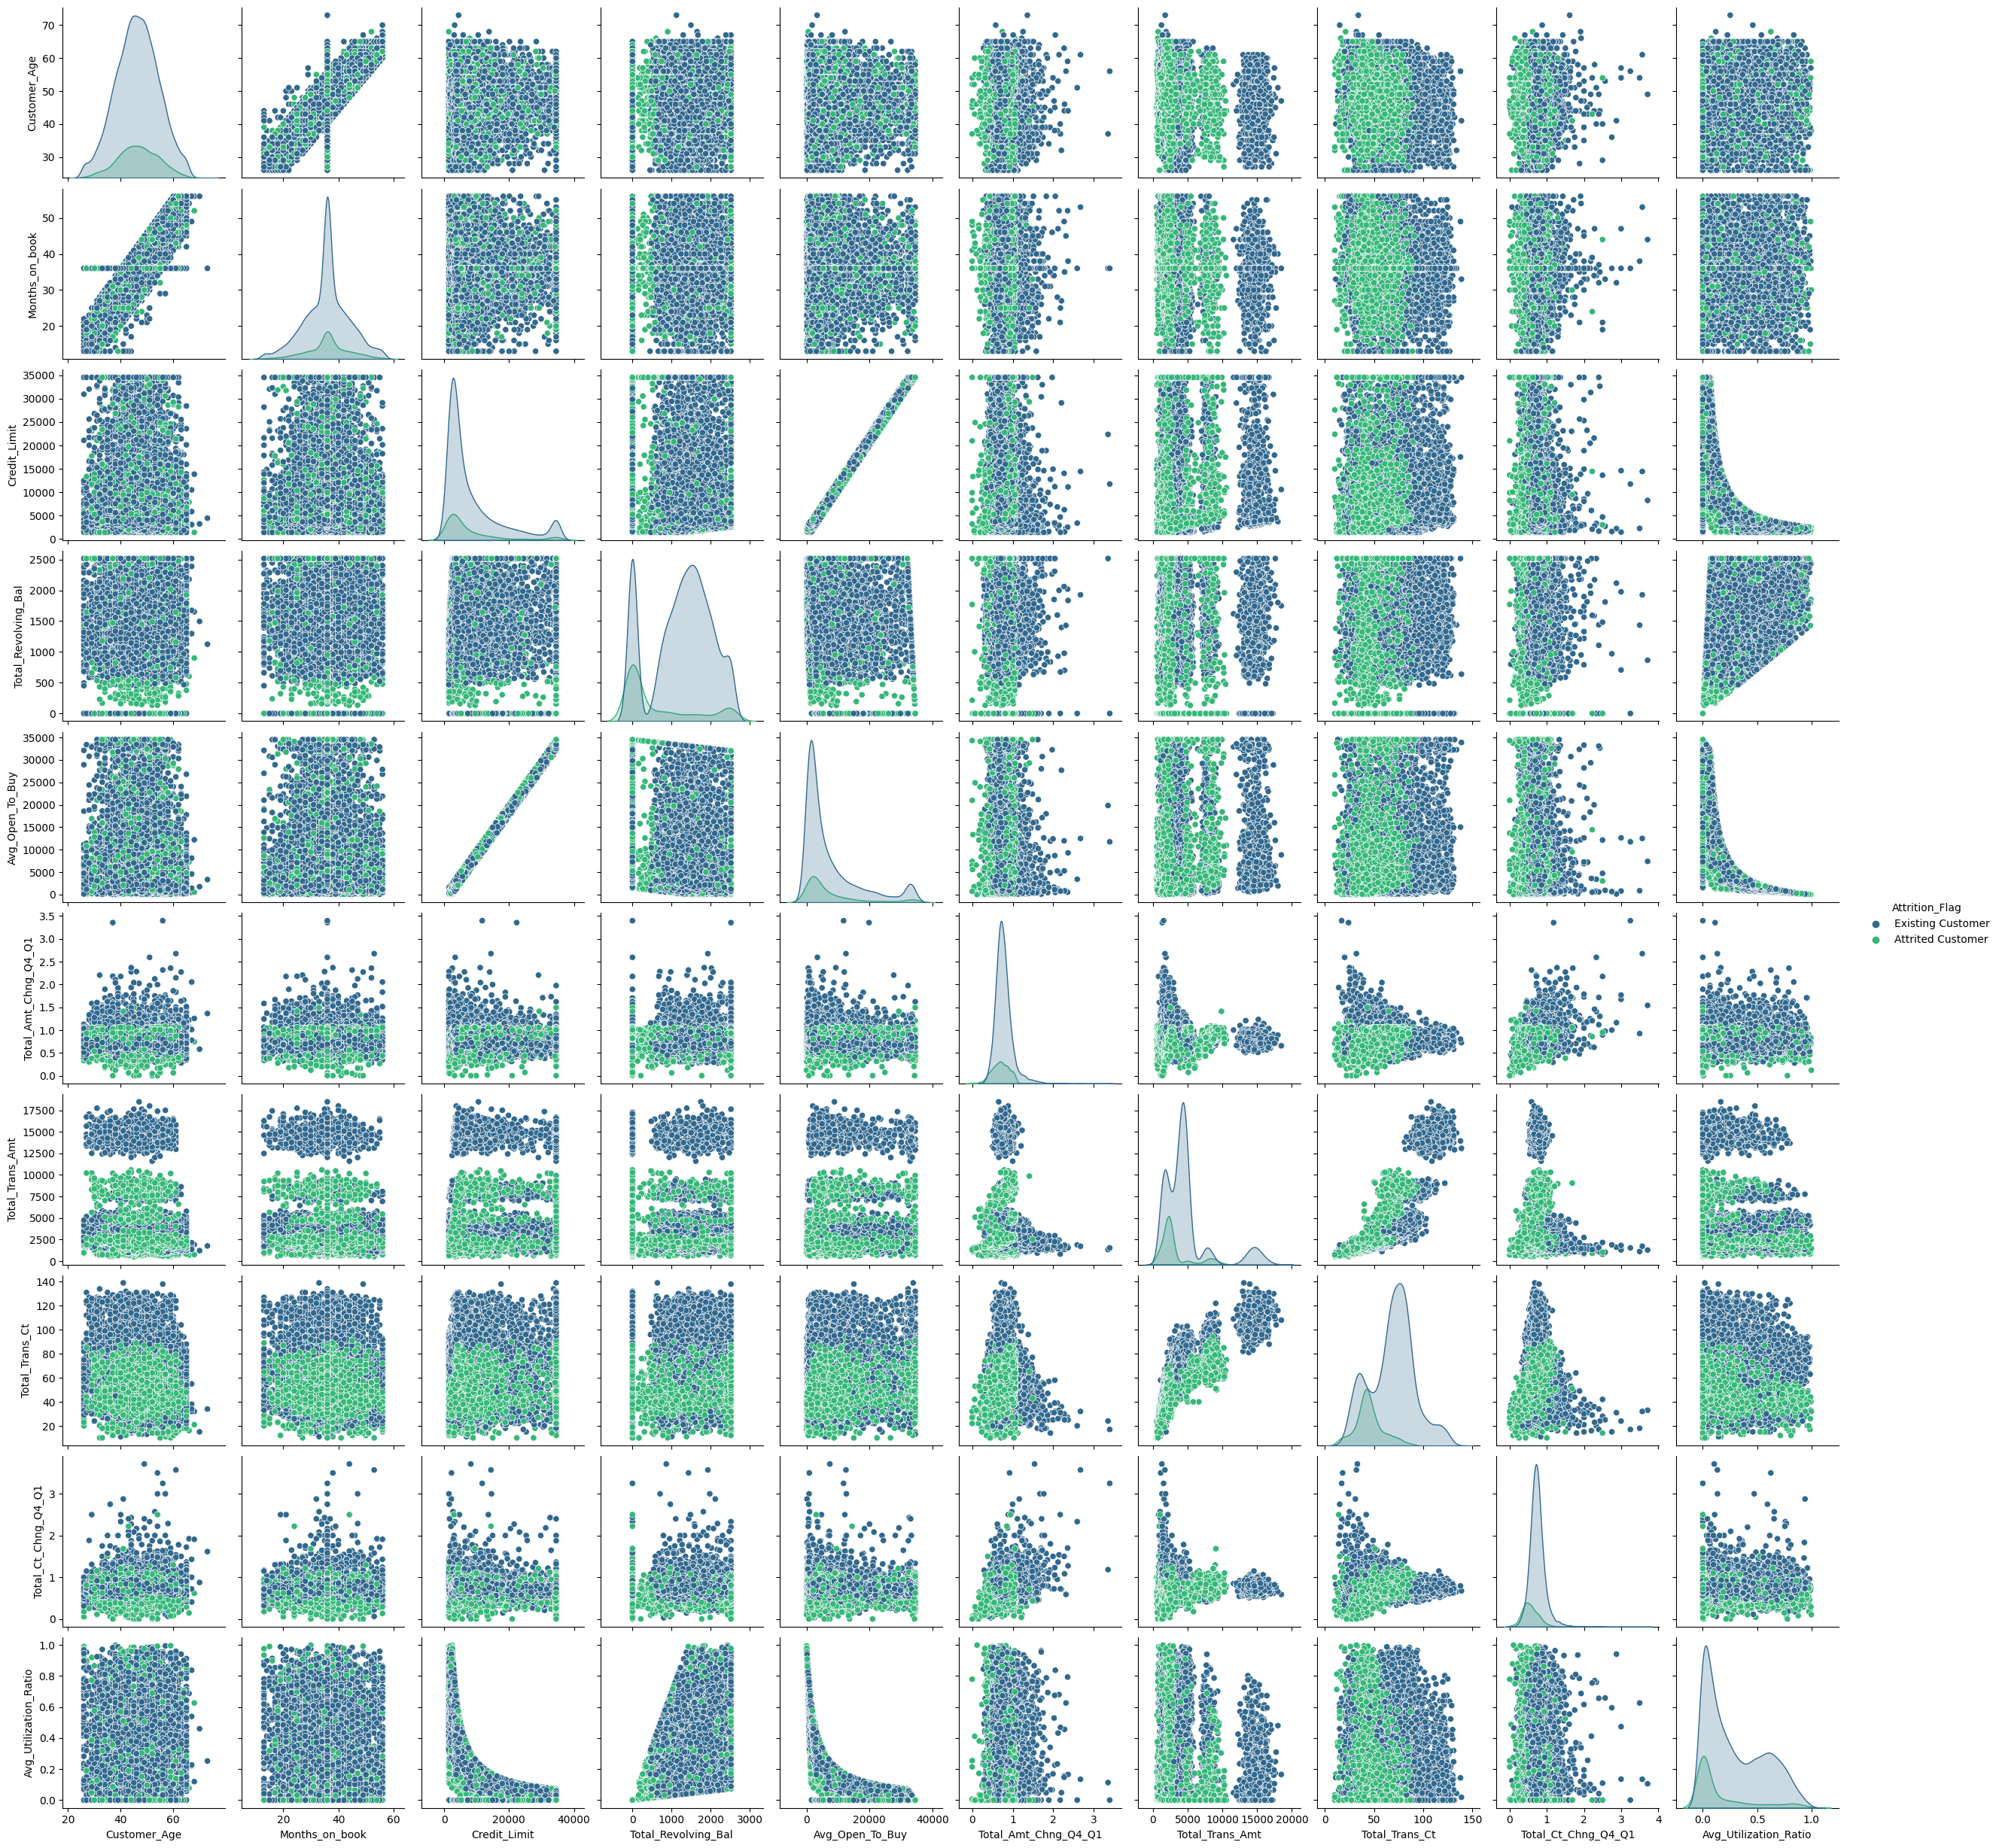

In [18]:
sns.pairplot(df[add_data],hue='Attrition_Flag',palette='viridis');

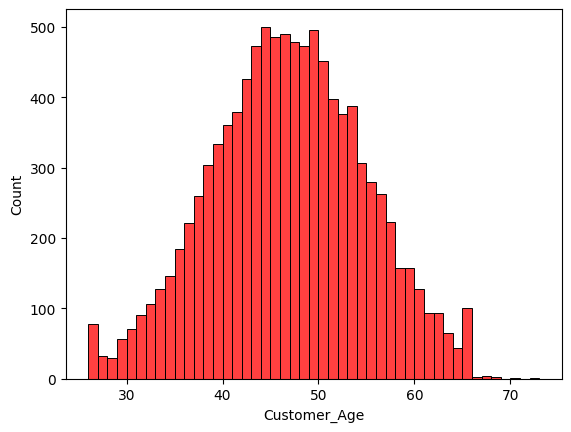

In [19]:
sns.histplot(df['Customer_Age'],color='red');

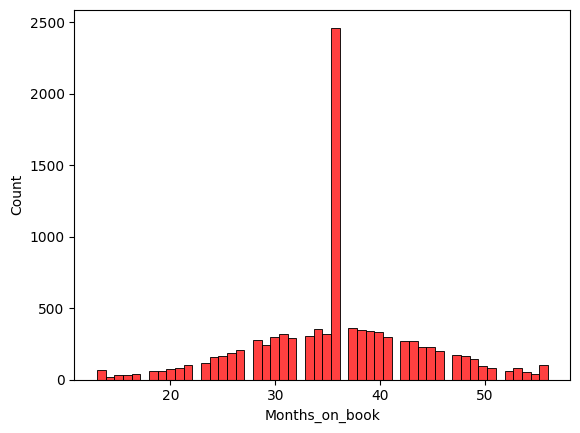

In [20]:
sns.histplot(df['Months_on_book'],color='red');

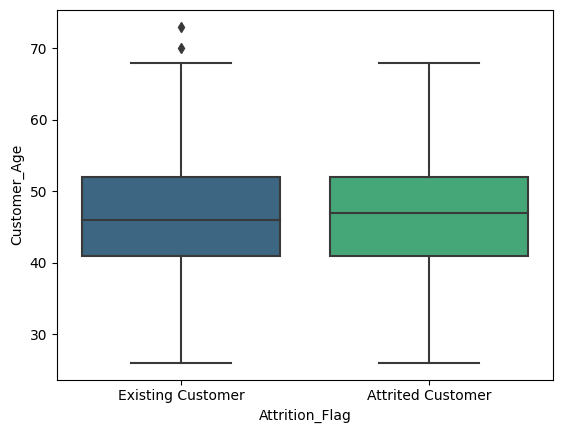

In [21]:
sns.boxplot(x=df['Attrition_Flag'],y=df['Customer_Age'],palette='viridis');

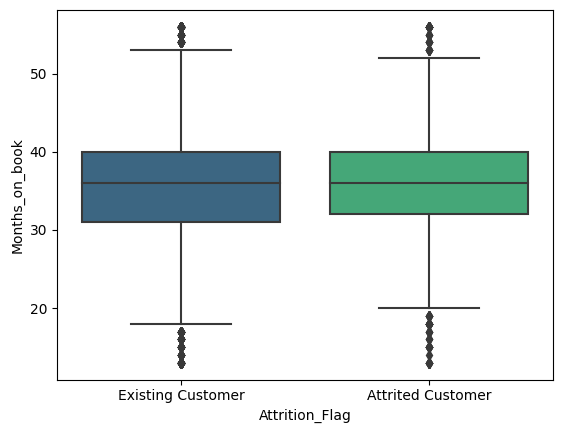

In [22]:
sns.boxplot(x=df['Attrition_Flag'],y=df['Months_on_book'],palette='viridis');

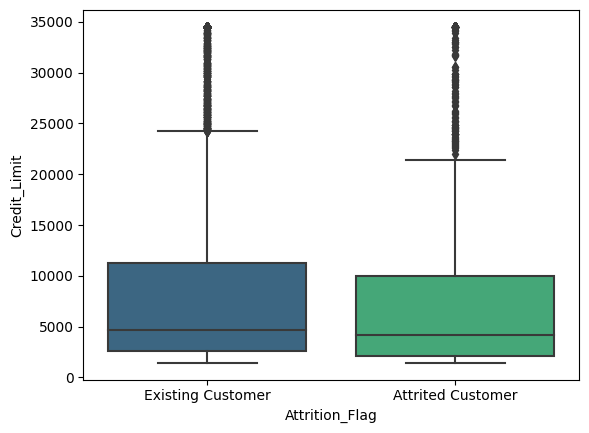

In [23]:
sns.boxplot(x=df['Attrition_Flag'],y=df['Credit_Limit'],palette='viridis');

### Feature Engineering

In [24]:
numericCols=df._get_numeric_data().columns
catCols=[x for x in df.columns if x not in numericCols]
numericCols

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [25]:
for i in catCols:
  print(i,len(df[i].unique()))

Attrition_Flag 2
Gender 2
Education_Level 7
Marital_Status 4
Income_Category 6
Card_Category 4


In [26]:
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [27]:
rank={"Unknown":0,"Uneducated":1,"High School":2,"College":3,"Graduate":4,"Post-Graduate":5,"Doctorate":6}
df['Education_Level']=df['Education_Level'].map(rank)
df['Education_Level'].value_counts()

4    3128
2    2013
0    1519
1    1487
3    1013
5     516
6     451
Name: Education_Level, dtype: int64

In [28]:
df['Marital_Status'].value_counts()  ### Nominal Encoding

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [29]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [30]:
rank={"Unknown":0,"Less than $40K":1,"$40K - $60K":2,"$60K - $80K":3,"$80K - $120K":4,"$120K +":5}
df['Income_Category']=df['Income_Category'].map(rank)
df['Income_Category'].value_counts()

1    3561
2    1790
4    1535
3    1402
0    1112
5     727
Name: Income_Category, dtype: int64

In [31]:
c=df["Card_Category"].value_counts().index
c

Index(['Blue', 'Silver', 'Gold', 'Platinum'], dtype='object')

In [32]:
dic={}
for i in range(len(c)):
  dic[c[i]]=i
dic


{'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3}

In [33]:
df['Card_Category']=df['Card_Category'].map(dic)
df['Card_Category'].value_counts()

0    9436
1     555
2     116
3      20
Name: Card_Category, dtype: int64

In [34]:
target='Attrition_Flag'
X=df.drop(target,axis=1)
y=df[target]
X

Customer_Age Gender  Dependent_count  Education_Level Marital_Status  \
0                45      M                3                2        Married   
1                49      F                5                4         Single   
2                51      M                3                4        Married   
3                40      F                4                2        Unknown   
4                40      M                3                1        Married   
...             ...    ...              ...              ...            ...   
10122            50      M                2                4         Single   
10123            41      M                2                0       Divorced   
10124            44      F                1                2        Married   
10125            30      M                2                4        Unknown   
10126            43      F                2                4        Married   

       Income_Category  Card_Category  Months_on_book  \
0                    3              0              39   
1                    1              0              44   
2                    4              0              36   
3                    1              0              34   
4                    3              0              21   
...                ...            ...             ...   
10122                2              0              40   
10123                2              0              25   
10124                1              0              36   
10125                2              0              36   
10126                1              1              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535     

In [62]:
X=pd.get_dummies(X,drop_first=True)
X

Customer_Age  Dependent_count  Education_Level  Income_Category  \
0                45                3                2                3   
1                49                5                4                1   
2                51                3                4                4   
3                40                4                2                1   
4                40                3                1                3   
...             ...              ...              ...              ...   
10122            50                2                4                2   
10123            41                2                0                2   
10124            44                1                2                1   
10125            30                2                4                2   
10126            43                2                4                1   

       Card_Category  Months_on_book  Total_Relationship_Count  \
0                  0              39                         5   
1                  0              44                         6   
2                  0              36                         4   
3                  0              34                         3   
4                  0              21                         5   
...              ...             ...                       ...   
10122              0              40                         3   
10123              0              25                         4   
10124              0              36                         5   
10125              0              36                         4   
10126              1              25                         6   

       Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  ...  \
0                           1                      3       12691.0  ...   
1                           1                      2        8256.0  ...   
2                           1                      0        3418.0  ...   
3                           4                      1        3313.0  ...   
4                           1                      0        4716.0  ...   
...                       ...                    ...           ...  ...   
10122                       2                      3        4003.0  ...   
10123                       2                      3        4277.0  ...   
10124                       3                      4        5409.0  ...   
10125                       3                      3        5281.0  ...   
10126                       2                      4       10388.0  ...   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Gender_M  \
0                    1.625                  0.061         1   
1                    3.714                  0.105         0   
2                    2.333                  0.000         1   
3                    2.333                  0.760         0   
4                    2.500                  0.000         1   
...                    ...                    ...       ...   
10122     

In [36]:
len(X._get_numeric_data().columns)  ## all are numerical columns

21

### Feature Selection

<AxesSubplot: >

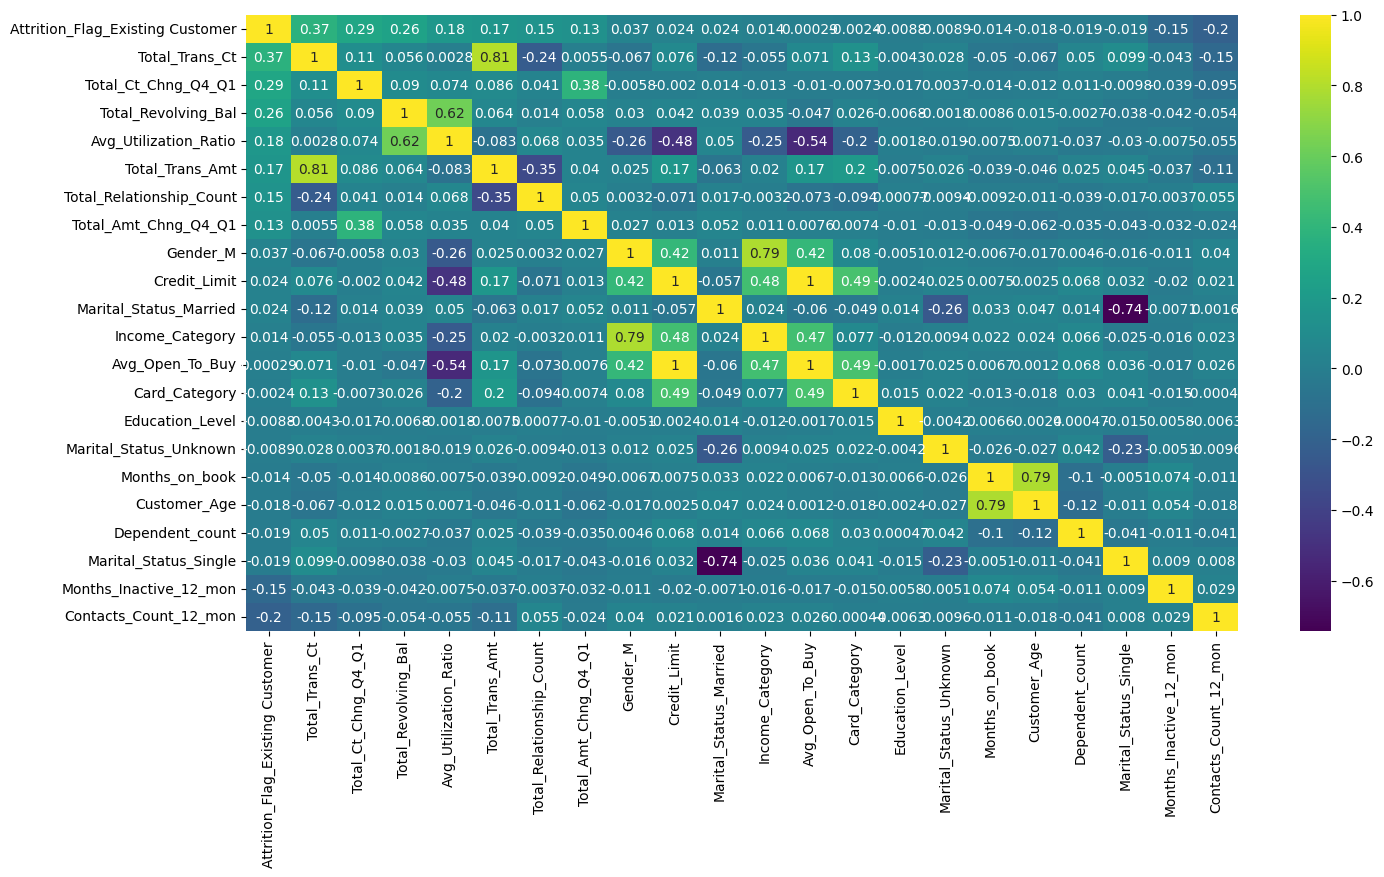

In [37]:
df1=pd.concat([X,y],axis=1)
df1=pd.get_dummies(df1,drop_first=True)
target1='Attrition_Flag_Existing Customer'
cols=df1[df1.corr().nlargest(22,target1)[target1].index].corr()
plt.figure(figsize=(16,8))
sns.heatmap(cols,annot=True,cmap='viridis')

In [38]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
bestfeats=SelectKBest(score_func=chi2,k=21)
bestfeats.fit(X,y)
df2=pd.DataFrame({"Cols":X.columns,"Scores":bestfeats.scores_}).sort_values(by='Scores',ascending=False).reset_index(drop=True)
df2

Cols         Scores
0            Total_Trans_Amt  754246.053313
1        Total_Revolving_Bal  400235.401723
2               Credit_Limit   55227.259276
3             Total_Trans_Ct   11865.365976
4      Contacts_Count_12_mon     211.039445
5   Total_Relationship_Count     144.398171
6     Months_Inactive_12_mon     102.667123
7      Avg_Utilization_Ratio      89.116891
8        Total_Ct_Chng_Q4_Q1      67.802873
9       Total_Amt_Chng_Q4_Q1      10.998295
10           Avg_Open_To_Buy       9.105136
11                  Gender_M       7.443223
12              Customer_Age       4.654893
13            Months_on_book       3.367526
14    Marital_Status_Married       3.064753
15           Dependent_count       2.626071
16     Marital_Status_Single       2.241029
17           Income_Category       1.946163
18           Education_Level       0.870603
19    Marital_Status_Unknown       0.743541
20             Card_Category       0.074718

In [39]:
from sklearn.tree import DecisionTreeClassifier
imps=DecisionTreeClassifier(criterion='entropy',random_state=15)
imps.fit(X,y)
df3=pd.DataFrame({"Cols":X.columns,"Imps":imps.feature_importances_}).sort_values(by='Imps',ascending=False).reset_index(drop=True)
df3

Cols      Imps
0             Total_Trans_Ct  0.329543
1            Total_Trans_Amt  0.173803
2        Total_Revolving_Bal  0.141064
3        Total_Ct_Chng_Q4_Q1  0.082485
4   Total_Relationship_Count  0.080194
5       Total_Amt_Chng_Q4_Q1  0.054131
6               Customer_Age  0.036967
7            Avg_Open_To_Buy  0.019671
8     Months_Inactive_12_mon  0.011215
9      Contacts_Count_12_mon  0.010964
10     Avg_Utilization_Ratio  0.010061
11            Months_on_book  0.009330
12           Dependent_count  0.008637
13              Credit_Limit  0.007075
14           Education_Level  0.006904
15     Marital_Status_Single  0.006370
16           Income_Category  0.006284
17                  Gender_M  0.001961
18    Marital_Status_Married  0.001901
19             Card_Category  0.000836
20    Marital_Status_Unknown  0.000606

All the features are important

### train-test-split


In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=15)

### preprocessing

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### Model Prediction

In [42]:
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [43]:
svc=SVC(random_state=15)

In [47]:
from seaborn.matrix import Grid
params={"kernel":["linear","rbf"],
        'C':[1,100,1000],
        'gamma':['auto',10,100]}
grid=HalvingGridSearchCV(estimator=svc,param_grid=params,n_jobs=-1,cv=3,refit=False,verbose=1,scoring='roc_auc',random_state=15)

In [48]:
grid.fit(X_train,y_train)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 843
max_resources_: 7595
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 18
n_resources: 843
Fitting 3 folds for each of 18 candidates, totalling 54 fits
----------
iter: 1
n_candidates: 6
n_resources: 2529
Fitting 3 folds for each of 6 candidates, totalling 18 fits
----------
iter: 2
n_candidates: 2
n_resources: 7587
Fitting 3 folds for each of 2 candidates, totalling 6 fits


HalvingGridSearchCV(cv=3, estimator=SVC(random_state=15), n_jobs=-1,
                    param_grid={'C': [1, 100, 1000], 'gamma': ['auto', 10, 100],
                                'kernel': ['linear', 'rbf']},
                    random_state=15, refit=False, scoring='roc_auc', verbose=1)

In [50]:
grid.best_params_

{'C': 100, 'gamma': 'auto', 'kernel': 'linear'}

In [51]:
svc=SVC(kernel='linear',C=100,gamma='scale',random_state=15)
svc.fit(X_train,y_train)

SVC(C=100, kernel='linear', random_state=15)

In [52]:
y_pred=svc.predict(X_test)
pd.Series(y_test).value_counts()

Existing Customer    2125
Attrited Customer     407
Name: Attrition_Flag, dtype: int64

In [53]:
y_test.value_counts()

Existing Customer    2125
Attrited Customer     407
Name: Attrition_Flag, dtype: int64

In [54]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))

                   precision    recall  f1-score   support

Attrited Customer       0.76      0.57      0.65       407
Existing Customer       0.92      0.97      0.94      2125

         accuracy                           0.90      2532
        macro avg       0.84      0.77      0.80      2532
     weighted avg       0.90      0.90      0.90      2532



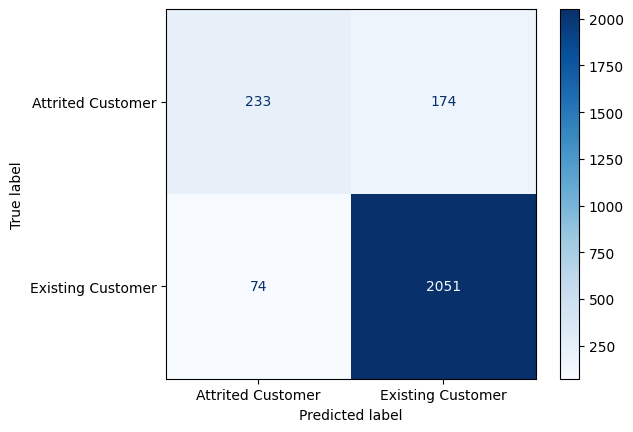

In [55]:
cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm,display_labels=svc.classes_).plot(cmap=plt.cm.Blues)

In [56]:
print("Accuracy :",svc.score(X_test,y_test)*100)

Accuracy : 90.20537124802527


### Conclusion:
1. There are more number of female Exisiting and Attrited Customers than male.
2. There are more number of customers who are Graduate.
3. There are more number of married Exisiting and Attrited Customers.
4. Most of the customers who leave their credit card services are earning a salary of less than $40K. Hence reducing the interest rates and annual fees of the credit card for the customers who earn less might increase the percentage of Existing credit card customers.
5. Most of the customer use the Blue Credit Card Category.
6. Most of the customers leave the Bank after 36 months.

In [75]:
x_ax = np.array([13, 14, 15, 16, 17, 18, 19])
x_ax = x_ax.reshape(-1, 1)
y_ax = [19.55, 19.18, 21.1, 24.51, 29.84, 37.48, 45.17]
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(x_ax, y_ax)

LinearRegression()

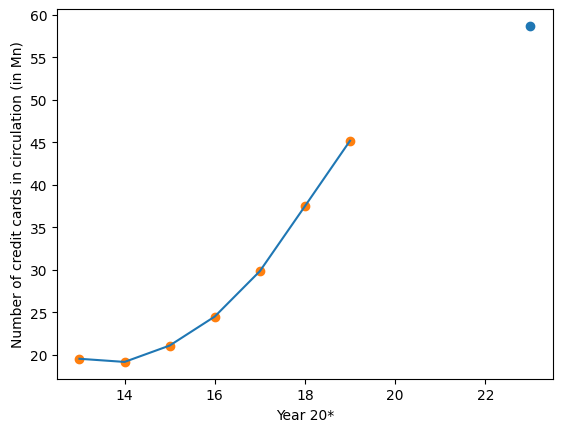

In year 2023, total Cards in circulation in India are predicted to be: 58 Mn


In [85]:
plt.plot(x_ax, y_ax)
plt.scatter(23, lr.predict([[23]]))
plt.scatter(x_ax, y_ax)
plt.xlabel("Year 20*")
plt.ylabel("Number of credit cards in circulation (in Mn)")
plt.show()
print("In year 2023, total Cards in circulation in India are predicted to be:", int(lr.predict([[23]])), "Mn")

In [78]:
print(lr.predict([[23]]))

[58.66857143]
